## Simulation: Drop needles

Suppose we have a floor made of parallel strips of wood, each the same width $t$, and we drop a needle with length $l=t$ onto the floor. What is the probability that the needle will lie across a line between two strips?

Below is an example of two needles dropped. Needle a falls across a line, while needle b does not.

![Example](needle.png)

In this coding homework, we will simulate such experiments and connect them with the estimation of $\pi$.

In [88]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

The first thing to write is a function *drop_needle*. It simulates dropping a needle onto the floor we described and returns whether the needle lies across a line between two strips. 

Now the question is how to describe the position of a needle using random variables. The figure below visualizes a needle sampled, with $t=l=1$ (see figure above). Remember that the needle should have an equal probability of landing in any position. In fact, we can uniformly sample the position of the needle's mass center and then uniformly sample the angle formed by the needle and the x-axis. Specifically, we only focus on the mass center's position with respect to (w.r.t.) the x-axis since we can assume the strip is long enough.

Besides, we do not need to sample the x-value of the center from $-\inf$ to $\inf$. Instead, we can uniformly sample it from $0$ to $2t$. Why is this the case?

In [ ]:
#Since the needle have an equal probability of landing in any position and the width of the strips are constant, 
#the probability of the needle's mass center being in any position will be the same as any positions. 
#This means that it doesn't matter whether the needle's mass center falls to the right or left. 
#If its outside 0 to 2t, it will just reappear on the other side.

[10pts]

In [71]:

def drop_needle(strip_length, needle_length):
    """
    Simulate dropping a needle on to the floor made of parallel strips of woods.
    Return whether the needle lie across a line between two strips.

    return: An Integer that equals to 1 if the needle lie across a line, and 0 otherwise.
    """ 
    i = random.uniform(0, 2*strip_length)
    theta = random.uniform(0, math.pi / 2)
    x = i + (needle_length / 2) * math.cos(theta)
    if x > strip_length:
        return 1
    else:
        return 0  
    # write your code here

Next, write a function run_simulation that calls drop_needle repetitively for n times. The function should return the probability that a dropped needle lies across a line based on the n trials. [5pts]

In [72]:
def run_simulation(n, strip_length, needle_length):
    """
    Repeat drop_needle experiment for n times. Return the probability that the needle will lie across a line. 

    :return: float, the probability that the needle will lie across a line according to the n experiments.
    """ 
    num = 0
    for t in range(n):
        num += drop_needle(strip_length, needle_length)
    return num / n
    # Write your code here

### Run the simulation

Run the *run_simulation* function 500 times with parameters n=1000, strip_length=1, and needle_length=1. Each time the function is going to return a probability of the needle lying across the line. Plot a histogram of those 500 probabilities. [5pts]

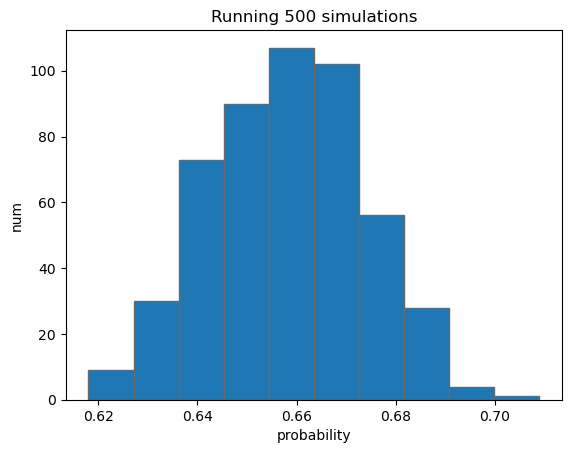

In [79]:
def run_simulation(n, strip_length, needle_length):
    num = 0
    for t in range(n):
        num += drop_needle(strip_length, needle_length)
    return num / n

results = [run_simulation(1000, 1, 1) for t in range(500)]
plt.hist(results, edgecolor='dimgrey')
plt.title("Running 500 simulations")
plt.xlabel("probability")
plt.ylabel("num")
plt.show()
    # Write your code here

## Estimate $\pi$ based on the returned probability

This experiment can be used to estimate the value of $\pi$. In the case where the needle length $l$ equals to the width $t$ of the strips, the probability of a needle lies across a line is $p=\frac{2}{\pi}$. Try to prove why this holds. [15pts]


Your proof: The question states that the needle length l equals to the width t of the strip. To find the probability that the needle lies across a line is (area when needle lies across a line / area of the total sample space).

To get the area when the needle lies across a line, we have to find when the distance from the center of the needle is greater than or equal to the x. Which means x <= (l/2)*cosθ. Therefore, using the integral, the area of the needle lying across a line is ∫ 0 to 𝜋/2 cosθdθ = l/2.

To get the total sample space, if we let x the distance from the center of the needle, 0 is when the needle is directly on the line of the stirp and l/2 is when the needle is directly on the center line of the strip. So the range of x will be 0 <= x <= l/2. And the θ is inbetween 0 <= θ <= 𝜋/2 since the θ is the angle formed by the x-axis and the neelde. Therefore, the total sample space which is the area of x*θ is equal to (l/2)*(𝜋/2) = l𝜋/4.

Therefore, the probability that the needle lies across a line = (1/2)/(l𝜋/4) = 2/𝜋, which the proof is solved.


Assume you know $p=\frac{2}{\pi}$, and you can call the function *run_simulation*. Let $X_i$ be the indicator random variable of dropping the $i$-th needle, i.e., $X_i=1$ if the $i$-th needle lies across a line, and $X_i=0$ otherwise. Let $S_n=\sum_{i=1}^n X_i$. How many needles do you need to drop, i.e., what value of $n$ should you take, to get the 95\% confidence interval of $S_n$? Use Chebyshev's inequality and let $\epsilon=0.1$. [15pts]

Your answer: $Pr(|\frac{S_n}{n} - \mu| \geq \epsilon) \leq \frac{Var(S_n/n)}{\epsilon^2} \leq \alpha \\$
$= Pr(|S_n - n\mu| \geq n\epsilon) \leq \frac{Var(S_n)}{n^2\epsilon^2}) \leq \alpha\\\\$
$= Pr(|S_n - \frac{2}{\pi}| \geq n\epsilon) \leq \frac{n\sigma^2}{n^2\epsilon^2} \leq \alpha\\\\$
$= Pr(|S_n - \frac{2}{\pi}| \geq n\epsilon) \leq \frac{\sigma^2}{n\epsilon^2} \leq \alpha\\\\$
So we get $\frac{(\frac{2}{\pi})(1-\frac{2}{\pi})}{n\epsilon^2} \leq \alpha = \frac{(\frac{2}{\pi})(1-\frac{2}{\pi})}{\alpha\epsilon^2} \leq n\\\\$
Plugging in $\epsilon = 0.1$ and $\alpha = 0.05,$ we get $\frac{(\frac{2}{\pi})(1-\frac{2}{\pi})}{(0.05)(0.1)^2} \leq n$



What does the CLT say about $S_n$? Run the *run_simulation* function with parameters n=5000, strip_length=1, and needle_length=1, and report a 95\% confidence interval of $S_n$ based on CLT (see lecture slides page 4 from Feb 2). [10pts] 

In [97]:
n = 5000
z = 1.96
sample_m = (run_simulation(5000,1,1))
sample_std = math.sqrt((sample_mean) * (1 - sample_mean)) / math.sqrt(n)
con_int = (sample_m - z*sample_std, sample_m + z*sample_std)
print ("sample_mean: " + str(sample_m))
print ("sample_std: "+ str (sample_std))
print ("Sample's confidence interval: " + str(con_int))
print ("Using the data from the sample, we are 95% confident that the mean is in between " + str(sample_m - z*sample_std) + " and " + str (sample_m + z*sample_std))
# Write your code here.

sample_mean: 0.6682
sample_std: 0.00671530252483088
Sample's confidence interval: (0.6550380070513315, 0.6813619929486685)
Using the data from the sample, we are 95% confident that the mean of the number of time is in between 0.6550380070513315 and 0.6813619929486685
